# Imports and Function definition

In [2]:
#-------------------------------------------------------------------------------
# Name:        module1
# Purpose:
#
# Author:      Saurabh kumar
#
# Created:     21/09/2016
# Copyright:   (c) Saurabh kumar 2016
# Licence:     <your licence>
#-------------------------------------------------------------------------------

#Package Imports
import nltk, re, csv
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk import PorterStemmer
from nltk.stem import WordNetLemmatizer
from random import shuffle


#Initializing for short usage
stopset = list(set(stopwords.words('english')))
ps = PorterStemmer()
lemm = WordNetLemmatizer()


#Function for basic preprocessing of the tweets
def preprocess(y):

    #The following code removes links, special characters etc.
    y = re.sub(r'http\S+', ' ', y)
    y = re.sub(r'[^\x00-\x7f]', r' ', y)
    y = re.sub(r'[^a-zA-Z]+', r' ', y)
    y = re.sub(r'\b\w{1,2}\b', r' ', y)
    

    return (y.lower())


def advprocess(y):

    #tokenizing using word_tokenize function from nltk package
    y = nltk.word_tokenize(y)

    #The following code make use of list comprehension for compact view
    y = [word for word in y if word not in stopset]
    y = [lemm.lemmatize(word) for word in y]
    y = [ps.stem(word) for word in y]
    

    return (' '.join(y))

    
    #Returning a dictionary as it is a suitable datatype for Naive Bayes Classifier
    #return dict([(word, True) for word in y])

In [3]:
df = pd.read_pickle('fintech_cleaned.pkl')


In [4]:
df = df.drop('topic',1).drop('followers',1)

In [5]:
print (df['tweet'].head())

0    #bitcoin #fintech Fedcoin: The U.S. Will Issue...
1    RT @guzmand: No one innovation is a silver bul...
2    How Smart Contracts Are Changing Financial Ser...
3    Satoshium Project Announced &amp; White Paper ...
5    RT @sdubois: NYSE to allow all US listed secur...
Name: tweet, dtype: object


In [5]:
df.tweet = [preprocess(tweet) for tweet in df.tweet]

df.tweet = [advprocess(tweet) for tweet in df.tweet]

print (df.tweet.head())

0             bitcoin fintech fedcoin issu currenc use
1    guzmand one innov silver bullet bank way adapt...
2    smart contract chang financi servic financi se...
3    satoshium project announc amp white paper rele...
5    sduboi nyse allow list secur trade floor finte...
Name: tweet, dtype: object


# Finding most common Tweet Locations

{'toronto': 6035, 'london': 27757, 'new york ': 4297, 'ottawa': 8542, 'paris': 4757}


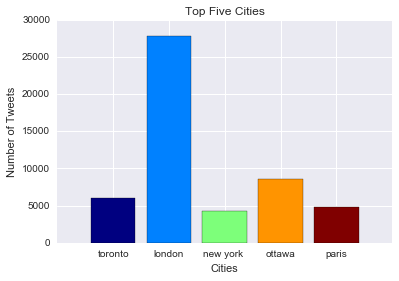

In [20]:
from collections import Counter
import seaborn as sns
%matplotlib inline 

def find_top_five():
    
    df.location = [preprocess(location) for location in df.location]
   
    #locations.append(location.split()[0] for location in df.location )
    locations = df.location.tolist()
    field = []
    for x in locations:
        if x == " ":
            continue
            
        elif "matter" in x:
            continue
        
        elif "global" in x:
            continue
            
        elif "new" in x:
            field.append(x.split(',')[0])
            
        elif "san"  in x:
            field.append(x.split(',')[0])
            
        elif "united" in x:
            field.append(x)
        
        else:    
            field.append(x.split()[0] )
            
    data = Counter(field)
    top_five = dict(data.most_common(5))
    print (top_five)
    
    jet = plt.get_cmap('jet')
    
    #Create Top 5 Citites Histogram
    plt.bar(range(len(top_five)), top_five.values(), align='center', color=jet(np.linspace(0, 1.0, len(top_five))))
    plt.xticks(range(len(top_five)), list(top_five.keys()))
    plt.xlabel('Cities')
    plt.ylabel('Number of Tweets')
    plt.title('Top Five Cities')
    plt.show()
    
find_top_five()

## We can see that the top 5 cities for tweet origin, with London by far the city with most tweet origin.

# Finding most important words in tweets - Wordcloud

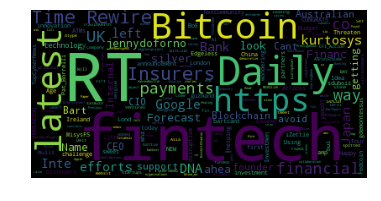

In [26]:
from wordcloud import WordCloud
%matplotlib inline 

def word_cloud(text):

    #Removing stop words
    #text = [word_feats(words) for words in text]

    #Generate a word cloud image
    wordcloud = WordCloud().generate(str(text))

    #Plot the wordcloud
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
word_cloud(df.tweet)

## From the worlcloud we can see that most widely used words are 'RT', 'Fintech' and 'Bitcoin'

#
# Sentiment Analysis
## 1. Overall
## 2. Context Based (with respect to two important contexts like 'bitcoin' and 'fintech')

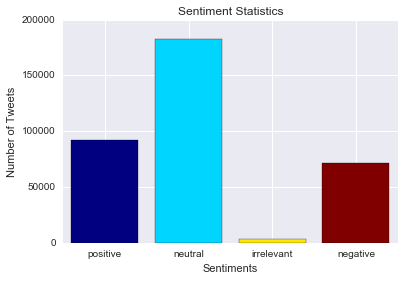

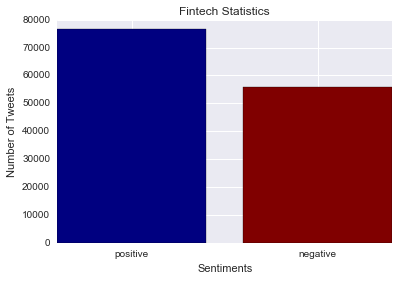

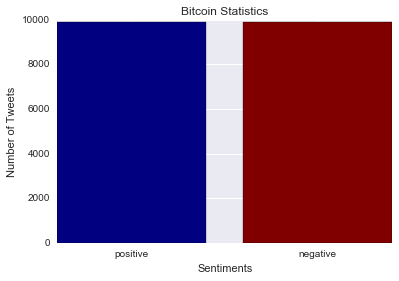



Positive tweet wordcloud


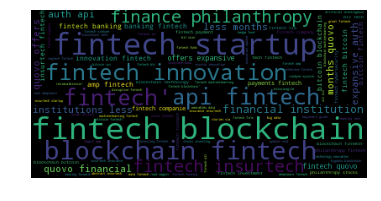



Negative tweet wordcloud


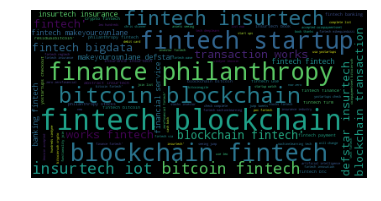

In [41]:
def adprocess(y):

    #tokenizing using word_tokenize function from nltk package
    y = nltk.word_tokenize(y)

    #The following code make use of list comprehension for compact view
    y = [word for word in y if word not in stopset]
    y = [lemm.lemmatize(word) for word in y]
    y = [ps.stem(word) for word in y]

    #Returning a dictionary as it is a suitable datatype for Naive Bayes Classifier
    return dict([(word, True) for word in y])


#Function to classify sentiment for tweets in the test_set.
#Uses Naive Bayes Classifier
def classify_naivebayes(train_set, test_set):

    #Training Naive Bayes
    classifier = nltk.NaiveBayesClassifier.train(train_set)

    #Classifying the test set
    output = [classifier.classify(text) for text in test_set]

    return output


def context_sentiment_analysis():

    #Fetching the test data and train data
    data = df.tweet
    train_data = pd.read_csv("corpus.csv", encoding = 'latin1')


    #Preprocessing Test and Train data
    data = [preprocess(text) for text in data]
    train_data.TweetText = [preprocess(text) for text in train_data.TweetText]
    #data.text = [advprocess(text) for text in data.text]
    #train_data.TweetText = [advprocess(text) for text in train_data.TweetText]

    #Splitting Training data into Irrelevant, neutral, positive and negative tweets.
    #This helps in better processing and training Naive Bayes Classifier
    irrids = list(train_data.TweetText[:1689])
    negids = list(train_data.TweetText[1690:2261])
    netids = list(train_data.TweetText[2262:4595])
    posids = list(train_data.TweetText[4596:])

    #Applying advanced processing on the training tweets
    pos_feats = [(adprocess(f), 'positive') for f in posids]
    neg_feats = [(adprocess(f), 'negative') for f in negids]
    irr_feats = [(adprocess(f), 'irrelevant') for f in irrids]
    net_feats = [(adprocess(f), 'neutral') for f in netids]

    #Getting the complete list of tweets for training
    trainfeats = irr_feats + pos_feats + neg_feats + net_feats

    #Shuffling the different category of tweets to mix them up
    shuffle(trainfeats)

    #Preparing Test set
    test_set = list(advprocess(words) for words in data)

    #Finding Sentiments for the Test set
    output_sentiments = classify_naivebayes(trainfeats, test_set)
    
    irrelevant_sentiments = 0
    positive_sentiments = 0
    negative_sentiments = 0
    neutral_sentiments = 0
    bit_pos = 0
    bit_neg = 0
    fin_pos = 0
    fin_neg = 0
    neg_tweet = []
    pos_tweet = []
    
    
    for i in (range(len(output_sentiments))):
    #Calculating the number of tweets in each sentiment category
        if output_sentiments[i] == 'positive':
            positive_sentiments+=1
            pos_tweet.append(data[i])
            
            if 'bitcoin' in data[i]:
                bit_pos+=1
            
            elif 'fintech' in data[i]:
                fin_pos+=1
                
        elif output_sentiments[i] == 'negative':
            negative_sentiments+=1
            neg_tweet.append(data[i])
            
            if 'bitcoin' in data[i]:
                bit_neg+=1
            
            elif 'fintech' in data[i]:
                fin_neg+=1

        elif output_sentiments[i] == 'neutral':
            neutral_sentiments+=1

        elif output_sentiments[i] == 'irrelevant':
            irrelevant_sentiments+=1
    
    sentiment_stat = {'irrelevant': irrelevant_sentiments, 'neutral': neutral_sentiments, 'positive': positive_sentiments, 'negative': negative_sentiments}
    fintech_stat = {'positive':fin_pos, 'negative':fin_neg}
    bitcoin_stat = {'positive':bit_pos, 'negative':bit_neg}
    
    #Create Sentiment Statistics Histogram
    jet = plt.get_cmap('jet')
    plt.bar(range(len(sentiment_stat)), sentiment_stat.values(), align='center', color=jet(np.linspace(0, 1.0, len(sentiment_stat))))
    plt.xticks(range(len(sentiment_stat)), list(sentiment_stat.keys()))
    plt.xlabel('Sentiments')
    plt.ylabel('Number of Tweets')
    plt.title('Sentiment Statistics')
    plt.show()
    
    print("\n")
    
    
    plt.bar(range(len(fintech_stat)), fintech_stat.values(), align='center', color=jet(np.linspace(0, 1.0, len(fintech_stat))))
    plt.xticks(range(len(fintech_stat)), list(fintech_stat.keys()))
    plt.xlabel('Sentiments')
    plt.ylabel('Number of Tweets')
    plt.title('Fintech Statistics')
    plt.show()
    
    print("\n")
    
    plt.bar(range(len(bitcoin_stat)), bitcoin_stat.values(), align='center', color=jet(np.linspace(0, 1.0, len(bitcoin_stat))))
    plt.xticks(range(len(bitcoin_stat)), list(bitcoin_stat.keys()))
    plt.xlabel('Sentiments')
    plt.ylabel('Number of Tweets')
    plt.title('Bitcoin Statistics')
    plt.show()
    
    print("\n")
    
    print ("Positive tweet wordcloud")
    word_cloud(pos_tweet)
    
    print("\n")
    
    print ("Negative tweet wordcloud")
    word_cloud(neg_tweet)
    
context_sentiment_analysis()

## We se from the graphs that most tweets are neutral.

### For the context 'Fintech', the positive tweets are more than negative tweets.
### For the context, 'Bitcoin', the positive and negative tweets are almost equal in number.

### From Positive wordcloud, we see some distinctive words like, 'api' and 'innovation'
### From Negative wordcloud, we see some distinctive words like, 'philanthropy' and 'insurtech'